`Visualización`

##### Importar paquetes

In [44]:
#importamos libreria
import numpy as np
import pandas as pd

#importamos librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

##### Cargar datos

In [45]:
# Ruta al archivo CSV en la carpeta data
file_path = '../data/online_course_engagement_data.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)

# Borramos datos duplicados y creamos un nuevo df1
df1 = df.drop_duplicates(keep='first')
df1 = df1.copy()

#dataframe (df2) que contiene aquellos usuarios que completarón el curso, de acuerdo a los registros
df2 = df1[df1['CourseCompletion'] == 1]

1. Grafico de Estadistica de finalización de cursos

C:\Users\Mariangel Arrieta\AppData\Local\Temp\ipykernel_24836\626987192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CourseCompletion', y='Count', data=completion_counts, palette='pastel')


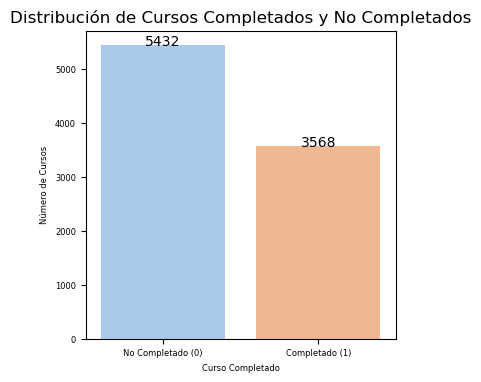

In [46]:
# Contar la cantidad de cursos completados y no completados
completion_counts = df['CourseCompletion'].value_counts().reset_index()
completion_counts.columns = ['CourseCompletion', 'Count']

# Crear gráfico de barras
plt.figure(figsize=(4, 4))
sns.barplot(x='CourseCompletion', y='Count', data=completion_counts, palette='pastel')

# Añadir títulos y etiquetas
plt.title('Distribución de Cursos Completados y No Completados', fontsize=12)
plt.xlabel('Curso Completado', fontsize=6)
plt.ylabel('Número de Cursos', fontsize=6)
plt.xticks(ticks=[0, 1], labels=['No Completado (0)', 'Completado (1)'], fontsize=6)
plt.yticks(fontsize=6)

# Añadir etiquetas de datos en las barras
for index, row in completion_counts.iterrows():
    plt.text(index, row['Count'], row['Count'], color='black', ha="center", fontsize=10)

# Mostrar la gráfica
plt.show()

2. Grafico Tiempo Dedicado al Curso vs. Finalización del Curso

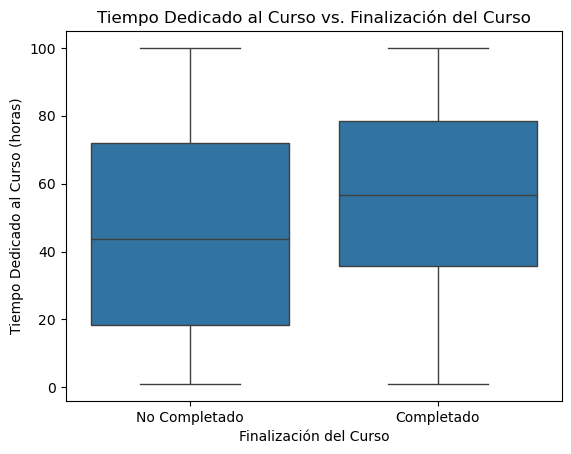

In [47]:
sns.boxplot(data=df1, x='CourseCompletion', y='TimeSpentOnCourse')
plt.title('Tiempo Dedicado al Curso vs. Finalización del Curso')
plt.xlabel('Finalización del Curso')
plt.ylabel('Tiempo Dedicado al Curso (horas)')
plt.xticks(ticks=[0, 1], labels=['No Completado', 'Completado'])
plt.show()


Se observa que la media de tiempo dedicado en cursos completados es mayor que cursos no completados

Crear un df_Categoria capture el tiempo total dedicado a cada categoría de curso por usuario

In [48]:
# Crear un df_categoria capture el tiempo total dedicado a cada categoría de curso por usuario
df_categoria = df1.groupby('CourseCategory')['TimeSpentOnCourse'].sum().reset_index()

# Renombrar la columna para mayor claridad
df_categoria.rename(columns={'TimeSpentOnCourse': 'SumPerCategory'}, inplace=True)
df_categoria['SumPerCategory']=df_categoria['SumPerCategory'].round(2)

print(df_categoria)

  CourseCategory  SumPerCategory
0           Arts        78855.83
1       Business        83629.18
2         Health        83429.41
3    Programming        83725.12
4        Science        81447.04


3. Gráfico de Barras para Tiempo total invertido en Categoría del curso

C:\Users\Mariangel Arrieta\AppData\Local\Temp\ipykernel_24836\315455914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CourseCategory', y='SumPerCategory', data=df_categoria, palette='viridis')


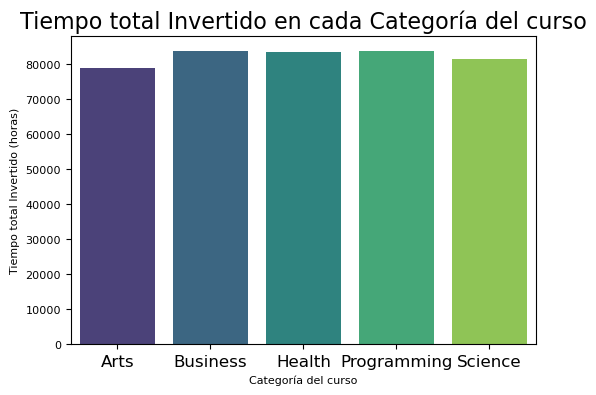

In [49]:
# Crear una visualización de barras con seaborn

plt.figure(figsize=(6, 4))
sns.barplot(x='CourseCategory', y='SumPerCategory', data=df_categoria, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Tiempo total Invertido en cada Categoría del curso', fontsize=16)
plt.xlabel('Categoría del curso', fontsize=8)
plt.ylabel('Tiempo total Invertido (horas)', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=8)

# Mostrar la gráfica
plt.show()

4. Gráfico de Caja para QuizScores por CourseCategory

C:\Users\Mariangel Arrieta\AppData\Local\Temp\ipykernel_24836\3526578335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CourseCategory', y='QuizScores', data=df1, palette='pastel')


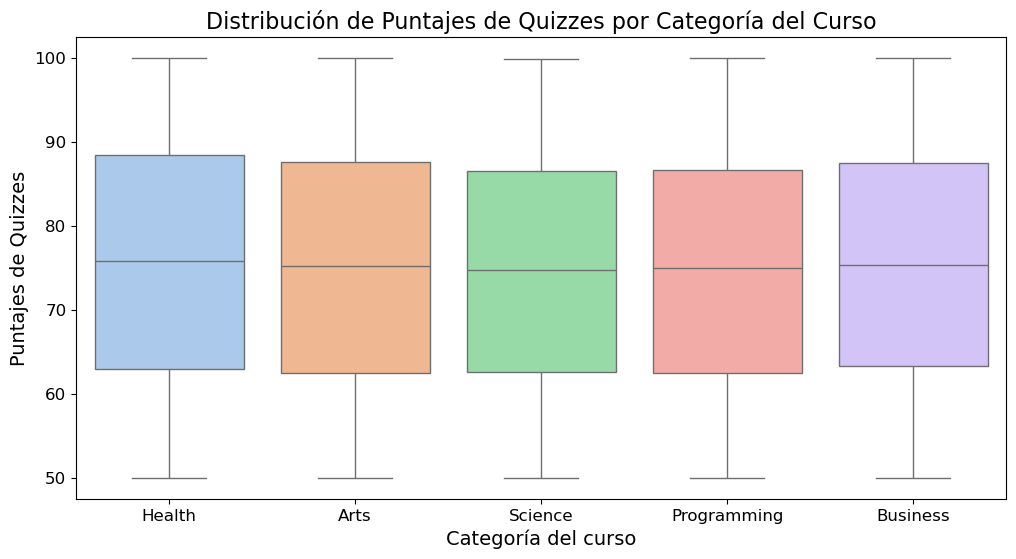

In [50]:
# Crear gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='CourseCategory', y='QuizScores', data=df1, palette='pastel')
plt.title('Distribución de Puntajes de Quizzes por Categoría del Curso', fontsize=16)
plt.xlabel('Categoría del curso', fontsize=14)
plt.ylabel('Puntajes de Quizzes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


5. TimeSpentOnCourse por DeviceType 

C:\Users\Mariangel Arrieta\AppData\Local\Temp\ipykernel_24836\3093878730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DeviceType', y='TotalTimeSpent', data=df3, palette='viridis')


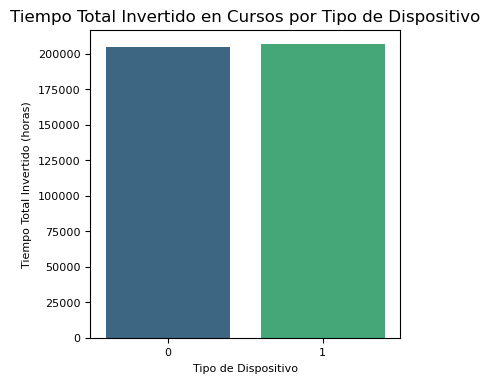

In [51]:
# Agrupar por DeviceType y sumar TimeSpentOnCourse
df3 = df1.groupby('DeviceType')['TimeSpentOnCourse'].sum().reset_index()
df3.rename(columns={'TimeSpentOnCourse': 'TotalTimeSpent'}, inplace=True)
df3['TotalTimeSpent'] = df3['TotalTimeSpent'].round(2)

# Crear gráfico de barras
plt.figure(figsize=(4, 4))
sns.barplot(x='DeviceType', y='TotalTimeSpent', data=df3, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Tiempo Total Invertido en Cursos por Tipo de Dispositivo', fontsize=12)
plt.xlabel('Tipo de Dispositivo', fontsize=8)
plt.ylabel('Tiempo Total Invertido (horas)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Mostrar la gráfica
plt.show()

6. TimeSpentOnCourse por DeviceType para df2, que contiene aquellos usuarios que completarón el curso, de acuerdo a los registros

C:\Users\Mariangel Arrieta\AppData\Local\Temp\ipykernel_24836\2540981181.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DeviceType', y='TotalTimeSpent', data=df4, palette='viridis')


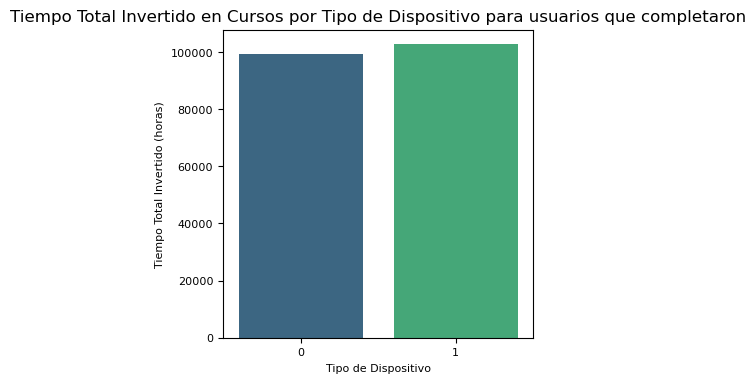

In [52]:
# Agrupar por DeviceType y sumar TimeSpentOnCourse
df4 = df2.groupby('DeviceType')['TimeSpentOnCourse'].sum().reset_index()
df4.rename(columns={'TimeSpentOnCourse': 'TotalTimeSpent'}, inplace=True)
df4['TotalTimeSpent'] = df4['TotalTimeSpent'].round(2)

# Crear gráfico de barras
plt.figure(figsize=(4, 4))
sns.barplot(x='DeviceType', y='TotalTimeSpent', data=df4, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Tiempo Total Invertido en Cursos por Tipo de Dispositivo para usuarios que completaron', fontsize=12)
plt.xlabel('Tipo de Dispositivo', fontsize=8)
plt.ylabel('Tiempo Total Invertido (horas)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Mostrar la gráfica
plt.show()

7. Grafico de correlación entre variables numericas.

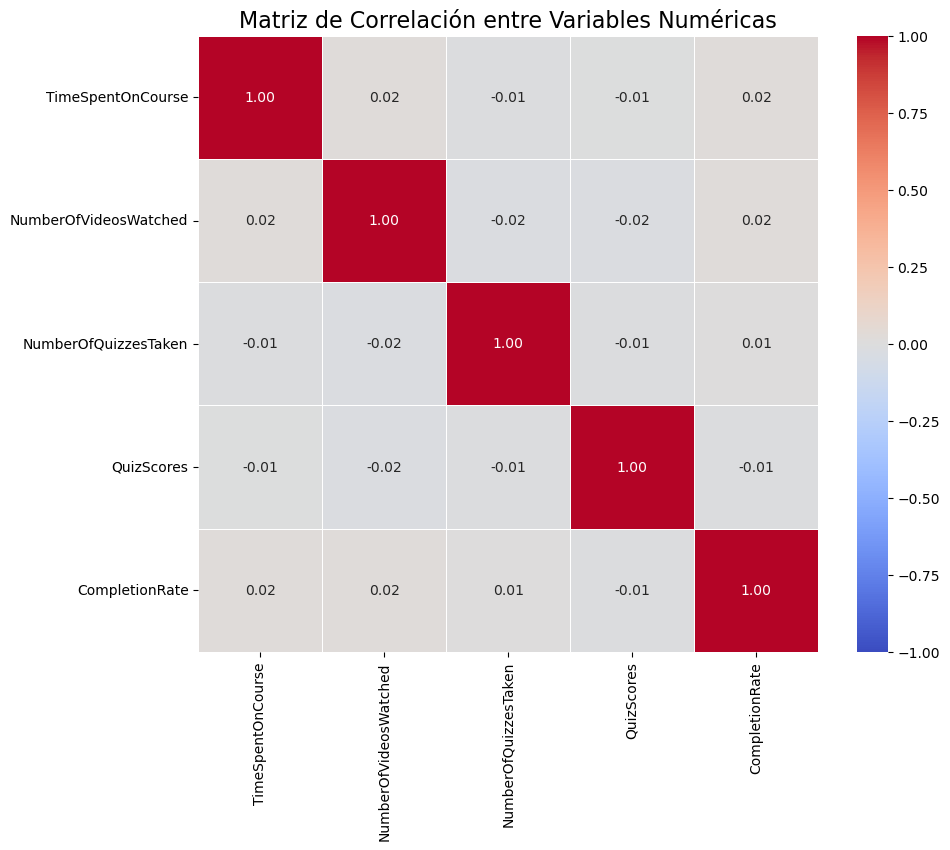

In [53]:
# Seleccionar columnas numéricas para la correlación
num_cols = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']
df_num = df[num_cols]

# Calcular la matriz de correlación
corr_matrix = df_num.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()